In [1]:
#Import Library

In [11]:
import os, shutil
import tensorflow as tf

In [3]:
#Dataset

In [45]:
original_dataset_dir = 'F:/py2 Q3/kaggle_original_data'

In [46]:
base_dir = 'F:/py2 Q3/Working directory'
os.mkdir(base_dir)

In [27]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [15]:
#Directories for trainning, validation and testing data

In [43]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [50]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [47]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [16]:
#Cat data

In [48]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [51]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

In [52]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

In [22]:
#Dog data

In [53]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [54]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [55]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [26]:
#dataset status now

In [56]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [29]:
#Building Model

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()

#convolutional base
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Flatten
model.add(layers.Flatten())

#Dense classifier
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
#Summary

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [1]:
#optimizer

In [16]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [17]:
#Data pre-processing --> ImageDataGenerator

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
#Rescaling

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(150, 150),
                  batch_size=20,
                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [32]:
#fitting

In [33]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 635s 6s/step - loss: 0.6885 - acc: 0.5375 - val_loss: 0.6653 - val_acc: 0.6010
Epoch 2/30
100/100 [==============================] - 755s 8s/step - loss: 0.6514 - acc: 0.6145 - val_loss: 0.6404 - val_acc: 0.6180
Epoch 3/30
100/100 [==============================] - 786s 8s/step - loss: 0.6109 - acc: 0.6640 - val_loss: 0.6198 - val_acc: 0.6410
Epoch 4/30
100/100 [==============================] - 693s 7s/step - loss: 0.5694 - acc: 0.7005 - val_loss: 0.5879 - val_acc: 0.6820
Epoch 5/30
100/100 [==============================] - 601s 6s/step - loss: 0.5403 - acc: 0.7185 - val_loss: 0.5874 - val_acc: 0.6810
Epoch 6/30
100/100 [==============================] - 600s 6s/step - loss: 0.5176 - acc: 0.7420 - val_loss: 0.5884 - val_acc: 0.6740
Epoch 7/30
100/100 [==============================] - 598s 6s/step - loss: 0.4841 - acc: 0.7585 - val_loss: 0.6087 - val_acc: 0.6930
Epoch 8/30
100/100 [==============================] - 596s 6s/step - 

In [34]:
#model saving

In [35]:
model.save('cats_and_dogs_small_1.h5')

In [36]:
#Plotting

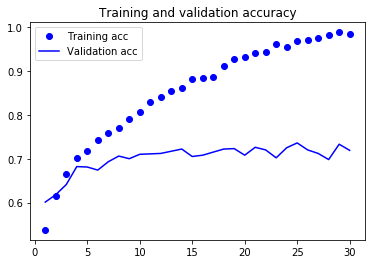

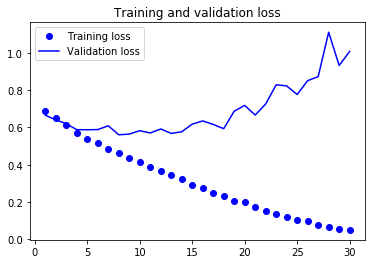

In [38]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [39]:
#Data augmentation by ImageDataGenerator

In [57]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [41]:
#Displaying some random images after augmentation

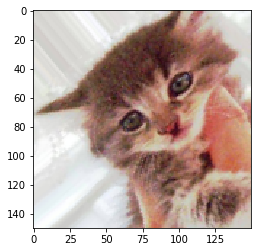

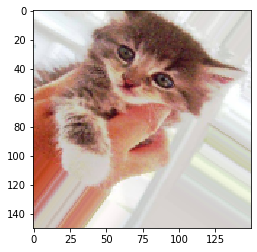

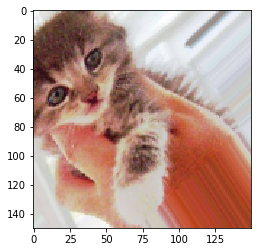

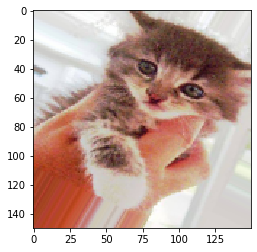

In [58]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [59]:
#New mmodel includes dropout

In [60]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [61]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [62]:
#Trainning using data augmentation generators

In [63]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [64]:
#Fitting

In [65]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 818s 8s/step - loss: 0.6930 - acc: 0.5116 - val_loss: 0.6839 - val_acc: 0.5793
Epoch 2/100
100/100 [==============================] - 931s 9s/step - loss: 0.6816 - acc: 0.5622 - val_loss: 0.6582 - val_acc: 0.6009
Epoch 3/100
100/100 [==============================] - 889s 9s/step - loss: 0.6716 - acc: 0.5703 - val_loss: 0.6475 - val_acc: 0.6180
Epoch 4/100
100/100 [==============================] - 892s 9s/step - loss: 0.6532 - acc: 0.5985 - val_loss: 0.6275 - val_acc: 0.6212
Epoch 5/100
100/100 [==============================] - 884s 9s/step - loss: 0.6336 - acc: 0.6367 - val_loss: 0.6369 - val_acc: 0.6148
Epoch 6/100
100/100 [==============================] - 894s 9s/step - loss: 0.6195 - acc: 0.6602 - val_loss: 0.8387 - val_acc: 0.5279
Epoch 7/100
100/100 [==============================] - 888s 9s/step - loss: 0.6067 - acc: 0.6641 - val_loss: 0.5792 - val_acc: 0.6872
Epoch 8/100
100/100 [==============================] - 915s 9s

Epoch 37/100
100/100 [==============================] - 962s 10s/step - loss: 0.4687 - acc: 0.7800 - val_loss: 0.4909 - val_acc: 0.7608
Epoch 38/100
100/100 [==============================] - 963s 10s/step - loss: 0.4683 - acc: 0.7783 - val_loss: 0.4395 - val_acc: 0.7944
Epoch 39/100
100/100 [==============================] - 957s 10s/step - loss: 0.4848 - acc: 0.7686 - val_loss: 0.4594 - val_acc: 0.7747
Epoch 40/100
100/100 [==============================] - 955s 10s/step - loss: 0.4557 - acc: 0.7838 - val_loss: 0.4417 - val_acc: 0.7716
Epoch 41/100
100/100 [==============================] - 971s 10s/step - loss: 0.4614 - acc: 0.7830 - val_loss: 0.5177 - val_acc: 0.7640
Epoch 42/100
100/100 [==============================] - 972s 10s/step - loss: 0.4634 - acc: 0.7797 - val_loss: 0.5577 - val_acc: 0.7627
Epoch 43/100
100/100 [==============================] - 968s 10s/step - loss: 0.4617 - acc: 0.7833 - val_loss: 0.4557 - val_acc: 0.7805
Epoch 44/100
100/100 [==========================

Epoch 73/100
100/100 [==============================] - 993s 10s/step - loss: 0.3797 - acc: 0.8304 - val_loss: 0.4346 - val_acc: 0.7951
Epoch 74/100
100/100 [==============================] - 977s 10s/step - loss: 0.3817 - acc: 0.8296 - val_loss: 0.4276 - val_acc: 0.8001
Epoch 75/100
100/100 [==============================] - 976s 10s/step - loss: 0.3682 - acc: 0.8310 - val_loss: 0.4606 - val_acc: 0.7957
Epoch 76/100
100/100 [==============================] - 970s 10s/step - loss: 0.3943 - acc: 0.8210 - val_loss: 0.5357 - val_acc: 0.7652
Epoch 77/100
100/100 [==============================] - 956s 10s/step - loss: 0.3732 - acc: 0.8371 - val_loss: 0.4132 - val_acc: 0.8280
Epoch 78/100
100/100 [==============================] - 979s 10s/step - loss: 0.3678 - acc: 0.8386 - val_loss: 0.4135 - val_acc: 0.8027
Epoch 79/100
100/100 [==============================] - 973s 10s/step - loss: 0.3711 - acc: 0.8333 - val_loss: 0.5521 - val_acc: 0.7912
Epoch 80/100
100/100 [==========================

In [66]:
#saving model 2

In [67]:
model.save('cats_and_dogs_small_2.h5')

In [68]:
#Plotting

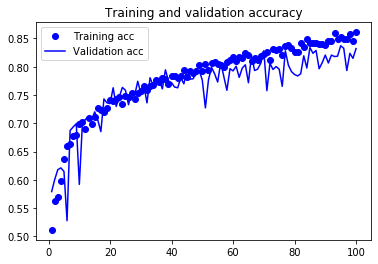

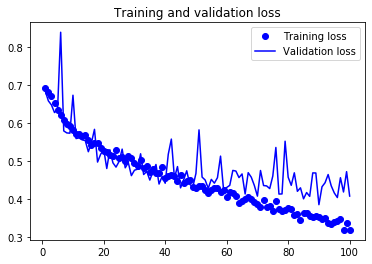

In [69]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()